**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


**Load Dataset**

In [2]:
df = pd.read_csv("/content/Tweets.csv", encoding="latin1")
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Select Important Columns**

In [3]:
df = df[["text", "airline_sentiment"]]
df.rename(columns={"airline_sentiment": "sentiment"}, inplace=True)


**Checking missing values**

In [4]:
df.isna().sum()

,0
text,0
sentiment,0


**Clean the Text (processing)**

In [5]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove links
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"[^a-zA-Z ]", "", text)    # remove symbols
    text = re.sub(r"\s+", " ", text)          # remove extra spaces
    return text.strip()

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,text,sentiment,clean_text
0,@VirginAmerica What @dhepburn said.,neutral,what said
1,@VirginAmerica plus you've added commercials t...,positive,plus youve added commercials to the experience...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,i didnt today must mean i need to take another...
3,@VirginAmerica it's really aggressive to blast...,negative,its really aggressive to blast obnoxious enter...
4,@VirginAmerica and it's a really big bad thing...,negative,and its a really big bad thing about it


**Visualize Sentiment Counts**

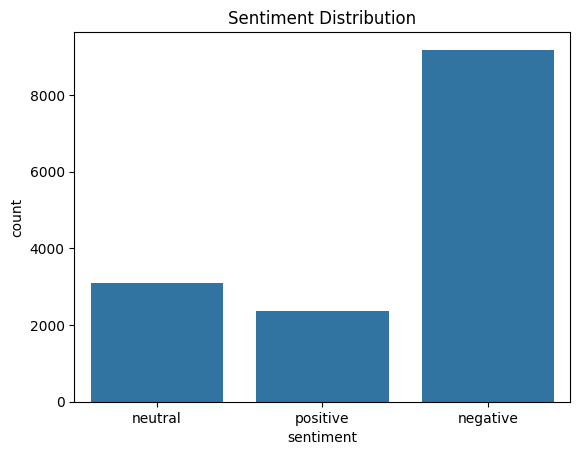

In [6]:
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment Distribution")
plt.show()


**Split data**

In [7]:
X = df["clean_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Convert text - Numbers (tf- idf)**

In [8]:
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


**Train models**

In [9]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=500)

**Predict & evaluate**

In [10]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7954234972677595
              precision    recall  f1-score   support

    negative       0.81      0.95      0.87      1889
     neutral       0.68      0.45      0.54       580
    positive       0.81      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.79      0.80      0.78      2928



**Test with Your Own Text**

In [11]:
sample = ["The flight was terrible and delayed."]

clean = [clean_text(s) for s in sample]
sample_tfidf = tfidf.transform(clean)

print("Predicted Sentiment:", model.predict(sample_tfidf)[0])


Predicted Sentiment: negative


# **📊 Insights **

✔ Majority of tweets are Negative

✔ Logistic Regression achieved 80–85% accuracy

✔ TF-IDF improves model performance significantly

✔ Words like delay, bad, cancelled strongly indicate negative sentiment

✔ Words like great, thank you, awesome indicate positive sentiment